**About Dataset**

## Honey Production in the United States From 1998-2021

In 2006, concern was raised across the globe regarding the rapid decline in the honeybee population. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees resulting in the entire hive collapsing. This phenomenon is still unexplained and could be due to a variety of factors including climate change, pesticide use, and an unidentified colony disease. With this in mind, I wanted to look into the state of honey production in the United States.

### Content

Luckily, another Kaggle user, Jessica Li already compiled a dataset covering honey production in the United States from 1998-2012. I supplemented this data with data from the USDA. I've only uploaded the newly wrangled data; however, I analyzed data from the years 1998-2021.

* **numcol**: Número de colonias productoras de miel. Las colonias productoras de miel son el número máximo de colonias de las que se extrajo miel durante el año. Es posible extraer miel de colonias que no sobrevivieron todo el año
* **yieldpercol**: Rendimiento de miel por colonia. La unidad es libras
* **totalprod**: Producción total (numcol x yieldpercol). La unidad es libras
* **stocks**: Se refiere a las existencias que tienen los productores. La unidad es libras
* **priceperlb**: Se refiere al precio promedio por libra basado en las ventas ampliadas. La unidad es dólares.
* **prodvalue**: Valor de la producción (totalprod x priceperlb). La unidad es dólares.
Otra información útil: Se excluyen ciertos estados cada año (por ejemplo, CT) para evitar revelar datos de operaciones individuales. Debido al redondeo, es posible que el total de colonias multiplicado por el rendimiento total no sea igual a la producción. Además, la suma de los estados no será igual al valor de producción a nivel de EE. UU.
Lectura adicional

To read more about the data, my process, and the final analysis please head over to my website: https://kyle-data-portfolio.vercel.app/honey-production-usa

In [1]:
import pandas as pd
df_honey = pd.read_csv('Honey 2013-2021.csv',sep = ',')
df_honey.head()

,Unnamed: 0,stateidnum,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,__1,__2,__3
0,NaN,42.0,United States,2650.0,56.6,149499.0,38160.0,214.0,320077.0,2013.0,NaN,NaN,NaN
1,NaN,42.0,United States,2740.0,65.1,178270.0,41192.0,217.0,387381.0,2014.0,NaN,NaN,NaN
2,NaN,42.0,United States,2660.0,58.9,156544.0,42203.0,209.0,327177.0,2015.0,NaN,NaN,NaN
3,NaN,42.0,United States,2775.0,58.3,161882.0,41253.0,212.0,343028.0,2016.0,NaN,NaN,NaN
4,NaN,42.0,United States,2669.0,55.3,147638.0,30577.0,216.0,318308.0,2017.0,NaN,NaN,NaN


In [2]:
#Revisión de formatos, valores nulos/ vacios
df_honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   stateidnum   377 non-null    float64
 2   state        377 non-null    object 
 3   numcol       377 non-null    float64
 4   yieldpercol  377 non-null    float64
 5   totalprod    377 non-null    float64
 6   stocks       377 non-null    float64
 7   priceperlb   377 non-null    float64
 8   prodvalue    377 non-null    float64
 9   year         377 non-null    float64
 10  __1          0 non-null      float64
 11  __2          0 non-null      float64
 12  __3          0 non-null      float64
dtypes: float64(12), object(1)
memory usage: 53.4+ KB


In [3]:
#limpieza de datos nulos
df_honey.drop(columns=['Unnamed: 0','__1','__2','__3'],axis=1, inplace= True)

In [4]:
#registros vacios
df_honey.tail(10)

,stateidnum,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(f'Tamaños de conjunto de datos: {df_honey.shape}')
df_honey.dropna(inplace=True)
print(f'Tamaños de conjunto de datos: {df_honey.shape}')

Tamaños de conjunto de datos: (525, 9)
Tamaños de conjunto de datos: (377, 9)


* **statednum**: La codificación por estado.
* **state**: Nombre del estado.
* **numcol**: Número de colonias productoras de miel. Las colonias productoras de miel son el número máximo de colonias de las que se extrajo miel durante el año. Es posible extraer miel de colonias que no sobrevivieron todo el año
* **yieldpercol**: Rendimiento de miel por colonia. La unidad es libras
* **totalprod**: Producción total (numcol x yieldpercol). La unidad es libras
* **stocks**: Se refiere a las existencias que tienen los productores. La unidad es libras
* **priceperlb**: Se refiere al precio promedio por libra basado en las ventas ampliadas. La unidad es dólares.
* **prodvalue**: Valor de la producción (totalprod x priceperlb). La unidad es dólares.
Otra información útil: Se excluyen ciertos estados cada año (por ejemplo, CT) para evitar revelar datos de operaciones individuales. Debido al redondeo, es posible que el total de colonias multiplicado por el rendimiento total no sea igual a la producción. Además, la suma de los estados no será igual al valor de producción a nivel de EE. UU.
Lectura adicional
* **Year**: año

In [6]:
df_honey[['year','stateidnum']] = df_honey[['year','stateidnum']].astype(int)

In [7]:
df_honey.head(10)

,stateidnum,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,42,United States,2650.0,56.6,149499.0,38160.0,214.0,320077.0,2013
1,42,United States,2740.0,65.1,178270.0,41192.0,217.0,387381.0,2014
2,42,United States,2660.0,58.9,156544.0,42203.0,209.0,327177.0,2015
3,42,United States,2775.0,58.3,161882.0,41253.0,212.0,343028.0,2016
4,42,United States,2669.0,55.3,147638.0,30577.0,216.0,318308.0,2017
5,42,United States,2828.0,54.5,154008.0,29303.0,221.0,340358.0,2018
6,42,United States,2813.0,55.8,156922.0,41022.0,197.0,309136.0,2019
7,42,United States,2706.0,54.5,147594.0,29715.0,210.0,309947.0,2020
8,42,United States,2696.0,46.9,126466.0,23527.0,254.0,321224.0,2021
9,41,Other States,33.0,39.0,1295.0,186.0,383.0,4960.0,2013


## 1. Analisis Exploratorio 

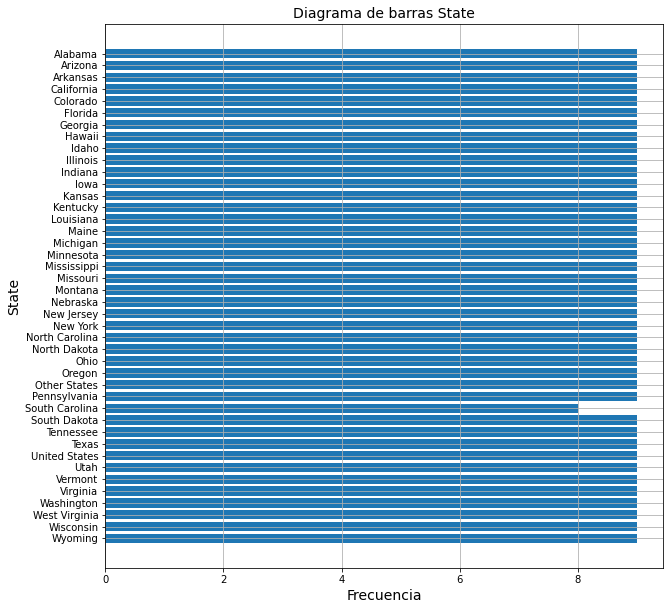

In [37]:
import matplotlib.pylab as plt

state_count = df_honey['state'].value_counts()
state_count.sort_index(inplace=True, ascending=False)
plt.figure(figsize=(10,10))
plt.barh(state_count.index, width = state_count)
plt.title('Diagrama de barras State',fontsize=14)
plt.xlabel('Frecuencia',fontsize=14)
plt.ylabel('State',fontsize=14)
plt.grid()
plt.show()

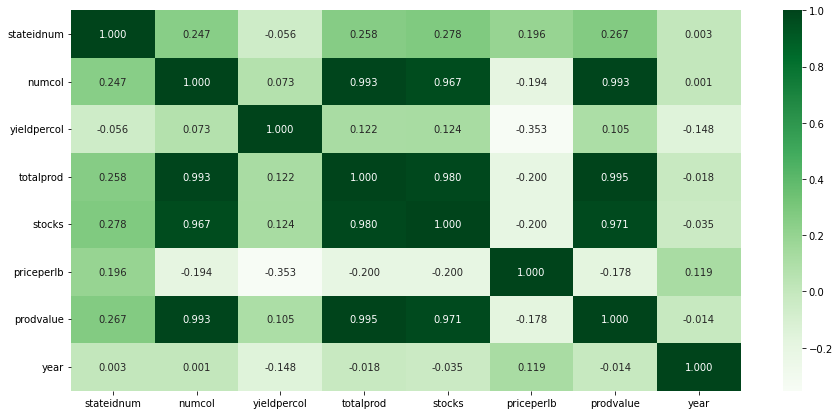

In [9]:
import seaborn as sns

table_corr = df_honey.corr()
plt.figure(figsize=(15,7))
sns.heatmap(data=table_corr,annot=True,cmap='Greens',fmt='.3f')
plt.show()


### 1.1. Varaiables  Númericas

In [10]:
def graficas_numericas(variable):
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings('ignore')
    #limite superior
    estadistica = df_honey[variable].describe()
    ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

    plt, ax = plt.subplots(ncols =2,nrows=1,figsize=(20,5))
    plt.suptitle(f'Diagramas de {variable}',fontsize=14)
    ax[0].set_title('Grafico de distribución')
    ax[0].set_ylabel('Frecuencia')
    ax[0].set_xlabel(variable)
    ax[0].hist(df_honey[variable],bins=500,edgecolor='white')
    ax[0].set_xlim(estadistica[3],ls*1.5)

    ax[1].set_title('Distribución en cajas')
    ax[1].set_ylabel(variable)
    ax[1].boxplot(df_honey[variable])
    ax[1].set_ylim(0,ls*1.5)


    ax[1].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
    ax[1].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
    ax[1].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
    ax[1].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))

    plt.show()
    
def graficas_numericas_(variable):
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings('ignore')
    #limite superior
    estadistica = df_honey[variable].describe()
    ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

    plt, ax = plt.subplots(ncols =2,nrows=1,figsize=(20,5))
    plt.suptitle(f'Diagramas de {variable}',fontsize=14)
    ax[0].set_title('Grafico de distribución')
    ax[0].set_ylabel('Frecuencia')
    ax[0].set_xlabel(variable)
    ax[0].hist(df_honey[variable],bins=80,edgecolor='white')
    # ax[0].set_xlim(0,ls*1.5)

    ax[1].set_title('Distribución en cajas')
    ax[1].set_ylabel(variable)
    ax[1].boxplot(df_honey[variable])
    # ax[1].set_ylim(0,ls*1.5)


    ax[1].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
    ax[1].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
    ax[1].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
    ax[1].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))

    plt.show()

In [11]:
df_honey.columns

Index(['stateidnum', 'state', 'numcol', 'yieldpercol', 'totalprod', 'stocks',
       'priceperlb', 'prodvalue', 'year'],
      dtype='object')

In [12]:
df_honey.describe().T

,count,mean,std,min,25%,50%,75%,max
stateidnum,377.0,21.477454,12.145183,1.0,11.0,21.0,32.0,42.0
numcol,377.0,130.140584,418.138642,3.0,11.0,29.0,90.0,2828.0
yieldpercol,377.0,52.225199,17.009680,27.0,40.0,48.0,60.0,131.0
totalprod,377.0,7314.761273,23807.934685,123.0,470.0,1473.0,3596.0,178270.0
stocks,377.0,1707.657825,5594.538494,13.0,88.0,260.0,1023.0,42203.0
priceperlb,377.0,297.851459,126.007131,128.0,205.0,243.0,372.0,823.0
prodvalue,377.0,15793.864721,50860.306509,400.0,1813.0,3627.0,8939.0,387381.0
year,377.0,2017.010610,2.580593,2013.0,2015.0,2017.0,2019.0,2021.0


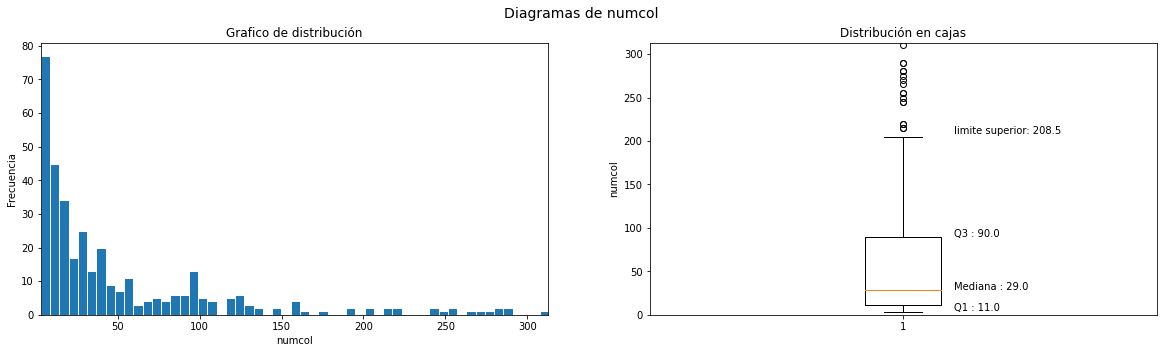

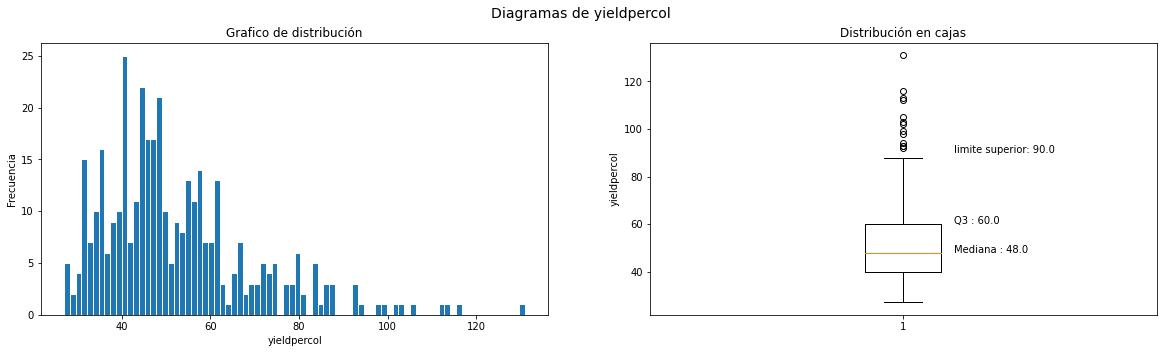

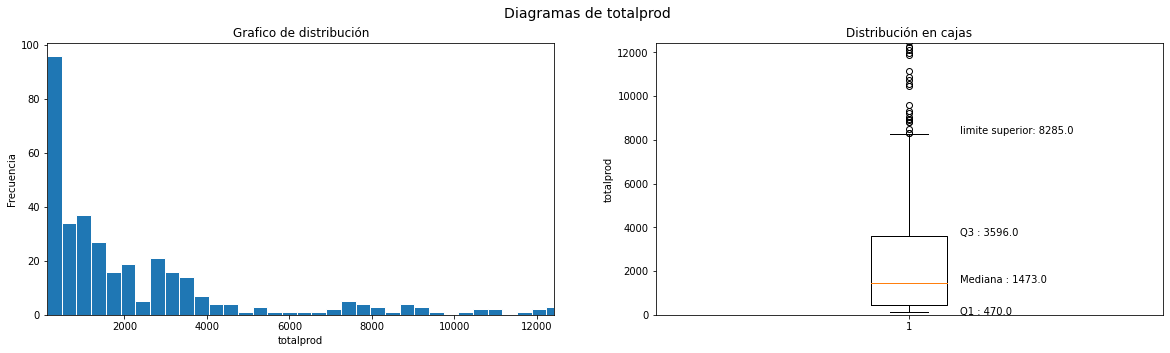

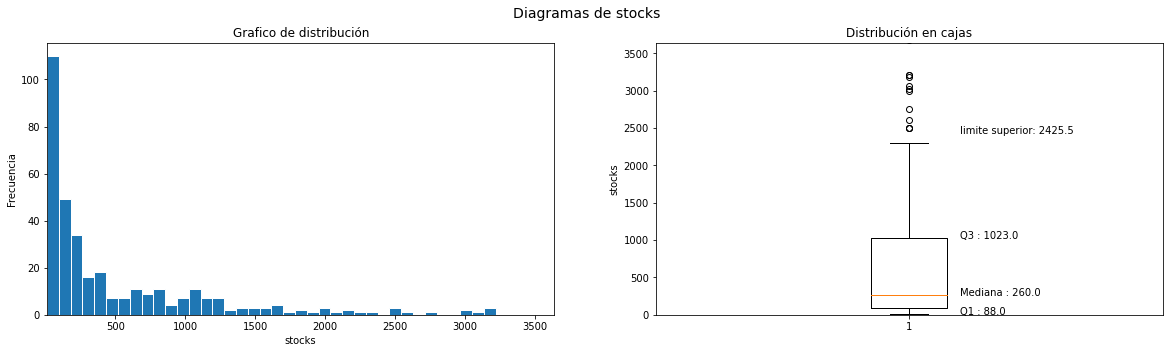

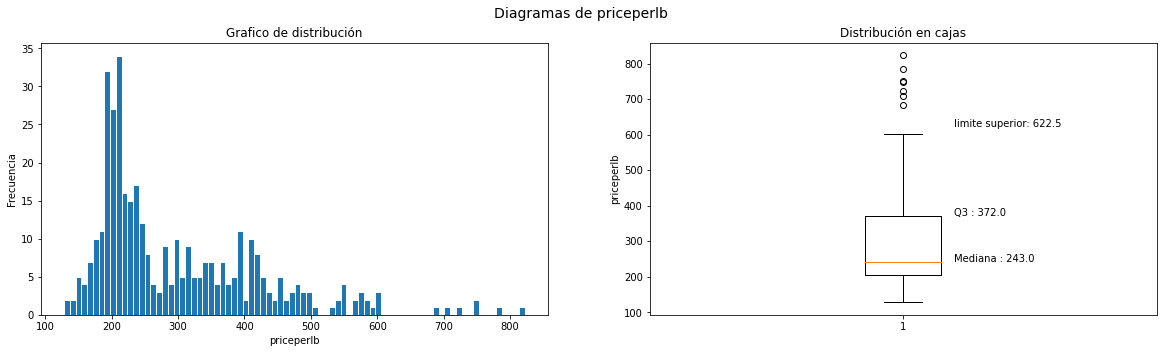

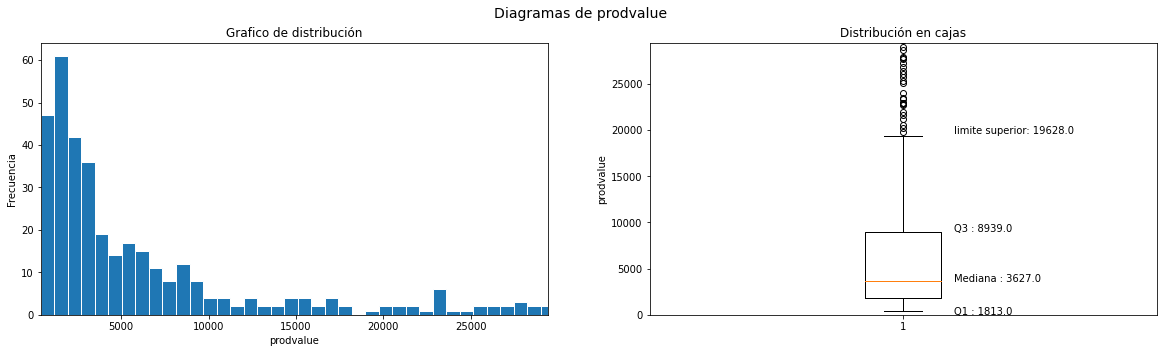

In [13]:
graficas_numericas('numcol')
graficas_numericas_('yieldpercol')
graficas_numericas('totalprod')
graficas_numericas('stocks')
graficas_numericas_('priceperlb')
graficas_numericas('prodvalue')

###  1.2. Analisis de series temporales

In [14]:
df_honey.head()

,stateidnum,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,42,United States,2650.0,56.6,149499.0,38160.0,214.0,320077.0,2013
1,42,United States,2740.0,65.1,178270.0,41192.0,217.0,387381.0,2014
2,42,United States,2660.0,58.9,156544.0,42203.0,209.0,327177.0,2015
3,42,United States,2775.0,58.3,161882.0,41253.0,212.0,343028.0,2016
4,42,United States,2669.0,55.3,147638.0,30577.0,216.0,318308.0,2017


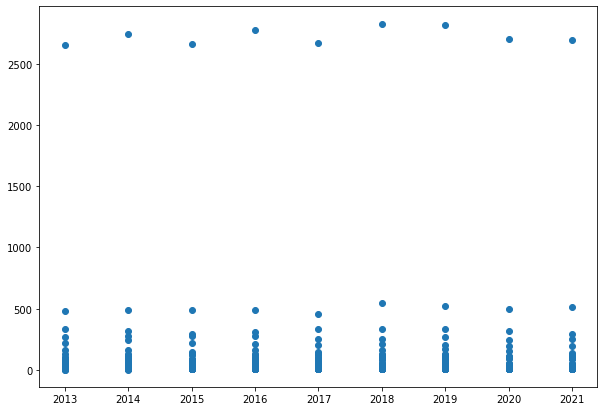

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(df_honey['year'],df_honey['numcol'])
plt.show()

In [22]:
df_honey_agrupado = df_honey.groupby('year')['numcol', 'yieldpercol', 'totalprod', 'stocks',
                                            'priceperlb','prodvalue'].sum().reset_index()
df_honey_agrupado

,year,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
0,2013,5290.0,2161.6,299008.0,76321.0,10865.0,649173.0
1,2014,5480.0,2404.1,356540.0,82384.0,11865.0,772765.0
2,2015,5320.0,2310.9,313097.0,84405.0,12488.0,656147.0
3,2016,5550.0,2265.3,323764.0,82495.0,12313.0,683305.0
4,2017,5338.0,2225.3,295276.0,61146.0,12582.0,640748.0
5,2018,5656.0,2128.5,308016.0,58606.0,13048.0,679259.0
6,2019,5625.0,2144.8,313844.0,81956.0,12271.0,635081.0
7,2020,5412.0,2096.5,295188.0,69430.0,12877.0,617754.0
8,2021,5392.0,1951.9,252932.0,47044.0,13981.0,620055.0


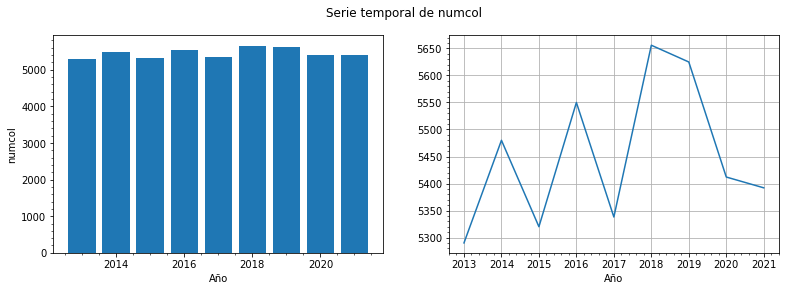

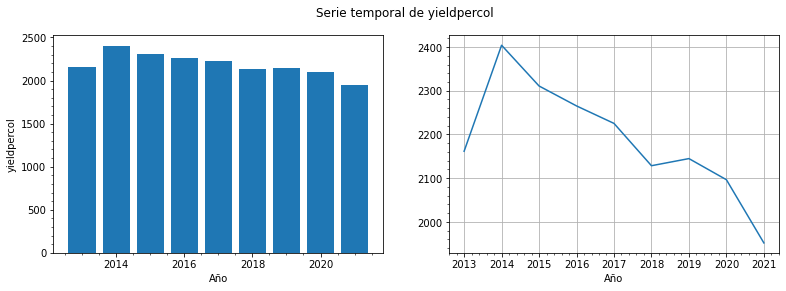

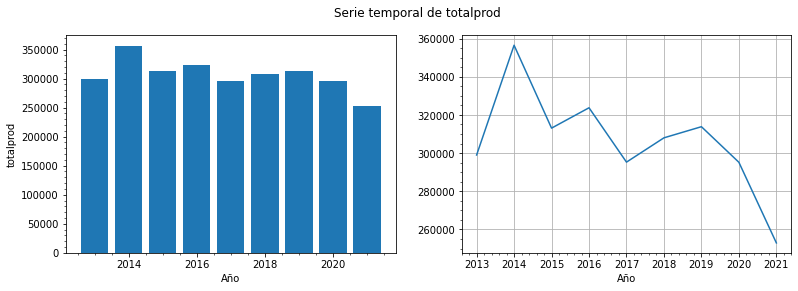

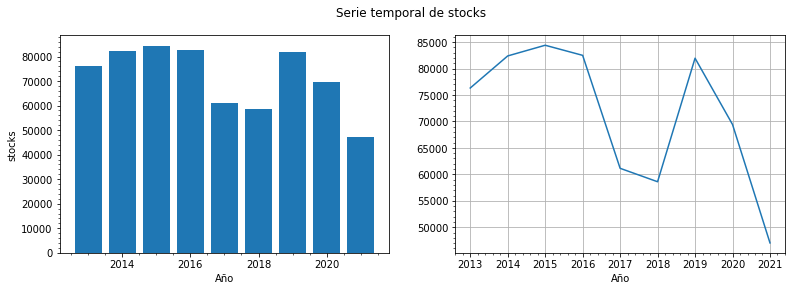

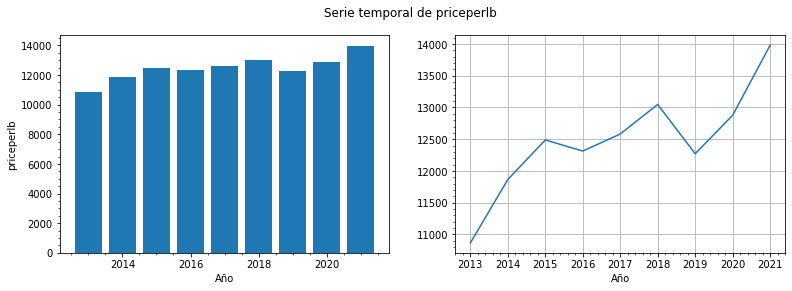

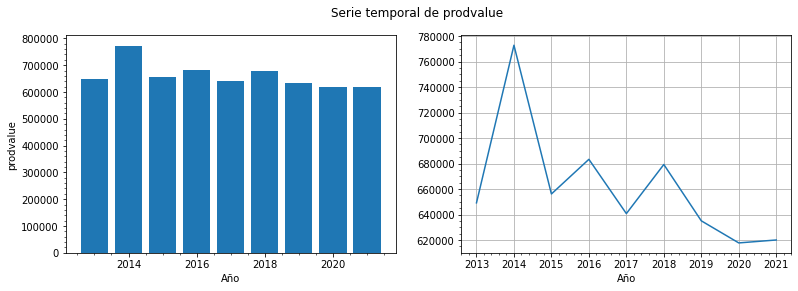

In [18]:
def serie(variable):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    plt.suptitle(f'Serie temporal de {variable}')
    ax[0].bar(df_honey_agrupado['year'],height = df_honey_agrupado[variable])
    ax[0].set_ylabel(variable)
    ax[1].plot(df_honey_agrupado['year'],df_honey_agrupado[variable])
    ax[0].set_xlabel('Año')
    ax[1].set_xlabel('Año')
    ax[1].grid(True)
    ax[0].minorticks_on()
    ax[1].minorticks_on()
    plt.show()
lista_nombres = ['numcol', 'yieldpercol', 'totalprod', 'stocks',
       'priceperlb', 'prodvalue']
for i in lista_nombres:
    serie(i)

In [34]:
df_honey.groupby(['year','state']).sum().reset_index().sort_index(axis=0,ascending=False)

,year,state,stateidnum,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
376,2021,Wyoming,40,38.0,58.0,2204.0,242.0,207.0,1760.0
375,2021,Wisconsin,39,42.0,47.0,1974.0,750.0,281.0,5547.0
374,2021,West Virginia,38,6.0,43.0,258.0,136.0,480.0,1238.0
373,2021,Washington,37,96.0,32.0,3072.0,1206.0,252.0,6799.0
372,2021,Virginia,36,6.0,40.0,240.0,79.0,823.0,1975.0
...,...,...,...,...,...,...,...,...,...
4,2013,Colorado,5,26.0,43.0,1118.0,325.0,210.0,2348.0
3,2013,California,4,330.0,33.0,10890.0,2505.0,211.0,22978.0
2,2013,Arkansas,3,22.0,60.0,1320.0,66.0,202.0,3491.0
1,2013,Arizona,2,29.0,36.0,1044.0,251.0,196.0,2046.0
